In [1]:
#Import chunk


import numpy as np

import math

import struct

import random

import time

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt


In [2]:
def tanh(x):
    return np.tanh(x)

def softmax(x):
    #这里减去x.max()为了防止指数爆炸，并不会影响结果
    exp=np.exp(x-x.max())
    return exp/exp.sum()

In [3]:
#Initial chunk

#两层的维度
dimension=[784,10]
#两层的激活函数
activation=[tanh,softmax]

distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimension[0]+dimension[1])),math.sqrt(6/(dimension[0]+dimension[1]))]}
]





In [4]:
#Parameter's initial


def init_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimension[layer])*(dist[1]-dist[0])+dist[0]


def init_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimension[layer-1],dimension[layer])*(dist[1]-dist[0])+dist[0]

def init_wb():
    parameter=[]
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='w':
                layer_parameter['w']=init_w(i)
            elif j=='b':
                layer_parameter['b']=init_b(i)
        parameter.append(layer_parameter)
    return parameter

In [5]:
parameters=init_wb()

In [6]:
def predict(image,parameters):
    hidden=activation[0](image+parameters[0]['b'])
    output=activation[1](np.dot(hidden,parameters[1]['w'])+parameters[1]['b'])
    return output

In [7]:
data_path='./datas/'

train_image_path=data_path+'train-images.idx3-ubyte'
train_label_path=data_path+'train-labels.idx1-ubyte'

test_image_path=data_path+'t10k-images.idx3-ubyte'
test_label_path=data_path+'t10k-labels.idx1-ubyte'


In [8]:
train_num=50000
validate_num=10000
test_num=10000

with open(train_image_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    tem_image=np.fromfile(f,dtype=np.uint8).reshape(-1,784)/255
    train_image=tem_image[:train_num]
    validate_image=tem_image[train_num:]
    
with open(test_image_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_image=np.fromfile(f,dtype=np.uint8).reshape(-1,784)/255
    

with open(train_label_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tem_label=np.fromfile(f,dtype=np.uint8)
    train_label=tem_label[:train_num]
    validate_label=tem_label[train_num:]

with open(test_label_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_label=np.fromfile(f,dtype=np.uint8)    
    

In [9]:
def show_train(index):
    print('label:'+str(train_label[index]))
    a_image=train_image[index].reshape(-1,28)
    plt.imshow(a_image,cmap='gray')
    
    
def show_validate(index):
    print('label:'+str(validate_label[index]))
    a_image=validate_image[index].reshape(-1,28)
    plt.imshow(a_image,cmap='gray')
    plt.pause(3)
    
def show_test(index):
    print('label:'+str(test_label[index]))
    a_image=test_image[index].reshape(-1,28)
    plt.imshow(a_image,cmap='gray')
    

In [10]:
label_keys=np.identity(dimension[-1])


In [11]:
def loss(image,label,parameters):
    y_predict=predict(image,parameters)
    y_label=label_keys[label]
    difference=y_predict-y_label
    return np.dot(difference,difference)

In [12]:
#loss(train_image[0],train_label[0],parameters)

In [13]:
def validate_verify(parameters):
    error_num=0
    for i in range(validate_num):
        
        if predict(validate_image[i],parameters).argmax()!=validate_label[i]:
        
            error_num+=1
            
    rate=1-error_num/validate_num
    print('准确率：'+str(rate*100)+'%')
    

In [14]:
#validate_verify(parameters)

In [15]:
def init_zero_grad():
    parameter=[]
    for layer in range(len(distribution)):
        layer_parameter={}
        for j in distribution[layer].keys():
            if j=='w':
                layer_parameter['w']=np.zeros((dimension[layer-1],dimension[layer]))
            elif j=='b':
                layer_parameter['b']=np.zeros(dimension[layer])
        parameter.append(layer_parameter)
    return parameter

In [16]:
def calculate_a_grad(image,label):
    
    l0=image+parameters[0]['b']
    
    h=activation[0](l0)
    
    l2=np.dot(h,parameters[1]['w'])+parameters[1]['b']
    
    l3=activation[1](l2)
    
    a_grad=[{},{}]
    
    #====1*10
    d_L_l3=2*(l3-label_keys[label])
    
    #====10*10
    d_l3_l2=np.diag(l3)-np.outer(l3,l3)
    
    
    d_L_l2=np.dot(d_L_l3,d_l3_l2)
    
    #10*10
    
    
    
    
    #并非一一对应关系
    
    
    #d_l2_h=parameters[1]['w']
    
    #d_h_l0=np.diag(1-np.tanh(l0)**2)
    
    
    
    
    
    #check
    a_grad[1]['b']=d_L_l2  
    
    #
    a_grad[1]['w']=np.outer(h,d_L_l2)
    
    #check
    
    
    #这个速度快，不用点乘
    a_grad[0]['b']=(1-np.tanh(l0)**2)*np.dot(parameters[1]['w'],d_L_l2)
    #a_grad[0]['b']=np.dot(np.dot(parameters[1]['w'],d_L_l2),d_h_l0)
    #a_grad[0]['b']=np.dot(np.dot(d_l2_h,d_L_l2),d_h_l0)
    #a_grad[0]['b']=1-(np.tanh(np.dot(d_L_l2,d_l2_h))**2)
    #print(zero_grad)
    
    

    #t((a_grad[i][j]-zero_grad[i][j]).max())
    return a_grad
            
            

In [17]:
banch_num=100
def calculate_banch_grad(banch_time):
    
    banch_grad=init_zero_grad()
    for i in range(banch_num*banch_time,banch_num*(banch_time+1)):
        
        #print('训练'+str(i+1)+'/'+str(banch_num)+'个参数')
        tem_grad=calculate_a_grad(train_image[i],train_label[i])
        for j in range(len(banch_grad)):
            for k in banch_grad[j].keys():
                banch_grad[j][k]+=tem_grad[j][k]
    for j in range(len(banch_grad)):
        for k in banch_grad[j].keys():
            banch_grad[j][k]/=banch_num
    
    
    return banch_grad           

In [18]:
parameters=init_wb()
validate_verify(parameters)

准确率：10.48%


In [19]:
def train_banch(banch_grad,learn_rate):
    #print('正在修正参数')
    for j in range(len(banch_grad)):
        for k in banch_grad[j].keys():
            parameters[j][k]-=learn_rate*banch_grad[j][k]
            
            

In [28]:
learn_rate=0.001
def train():
    
    for i in tqdm_notebook(range(train_num//banch_num)):
        #time0=time.time()
        #print('#===============开始训练第'+str(i+1)+'/'+str(train_num//banch_num)+'组==============#')
        banch_grad=calculate_banch_grad(i)
        
        train_banch(banch_grad,learn_rate)
        #time1=time.time()
        #print('当前组用时：{}s'.format(time1-time0))
        #validate_verify(parameters)
    #print('Train Over!')
    
    

In [30]:
tem_time0=time.time()
epoch=100
for i in tqdm_notebook(range(epoch)):
    train()
    validate_verify(parameters)
tem_time1=time.time()
print('总用时：{}'.format(tem_time1-tem_time0))


准确率：90.72%


准确率：90.72%


准确率：90.74%


准确率：90.74%


准确率：90.74%


准确率：90.75%


准确率：90.75999999999999%


准确率：90.75999999999999%


准确率：90.78%


准确率：90.8%


准确率：90.81%


准确率：90.8%


准确率：90.81%


准确率：90.82000000000001%


准确率：90.81%


准确率：90.82000000000001%


准确率：90.82000000000001%


准确率：90.82000000000001%


准确率：90.83%


准确率：90.83%


准确率：90.84%


准确率：90.84%


准确率：90.84%


准确率：90.85%


准确率：90.85%


准确率：90.86%


准确率：90.86%


准确率：90.88000000000001%


准确率：90.88000000000001%


准确率：90.9%


准确率：90.91%


准确率：90.92%


准确率：90.92%


准确率：90.92%


准确率：90.93%


准确率：90.94%


准确率：90.95%


准确率：90.95%


准确率：90.96%


准确率：90.97999999999999%


准确率：90.97999999999999%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：91.0%


准确率：91.0%


准确率：91.0%


准确率：91.0%


准确率：91.0%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：90.99000000000001%


准确率：91.01%


准确率：91.0%


准确率：91.0%


准确率：91.0%


准确率：91.01%


准确率：91.01%


准确率：91.01%


准确率：91.01%


准确率：91.0%


准确率：91.0%


准确率：91.01%


准确率：91.02%


准确率：91.03%


准确率：91.03%


准确率：91.03%


准确率：91.03%


准确率：91.03%


准确率：91.03%


准确率：91.03%


准确率：91.03%


准确率：91.03%


KeyboardInterrupt: 

In [23]:
#未训练时
validate_verify(parameters)

准确率：91.72%


In [25]:
#训练前77组(每组500个数据)数据后
validate_verify(parameters)

准确率：92.17%


In [259]:
#训练前85组(每组500个数据)数据后
validate_verify(parameters)

准确率：88.74%


In [45]:
#训练前89组(每组500个数据)数据后
validate_verify(parameters)

准确率：93.54%


In [272]:
validate_verify(parameters)

准确率：92.19%


In [276]:
validate_verify(parameters)

准确率：92.5%


In [46]:
def rrrr(index):
    print('预测序号：{}'.format(index))
    print('我的预测：{}'.format(predict(train_image[index],parameters).argmax()))
    show_train(index)


In [43]:
def validate_verify_show():
    error_num=0
    for i in range(validate_num):
        predict_label=predict(validate_image[i],parameters).argmax()
        if predict_label!=validate_label[i]:
            error_num+=1
            print('预测序号：{}'.format(i))
            print('我的预测：{}'.format(predict_label))
            show_validate(i)

预测序号：7
我的预测：5
label:3


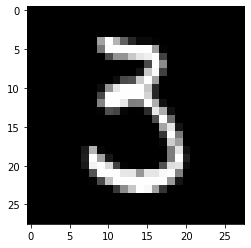

预测序号：17
我的预测：8
label:5


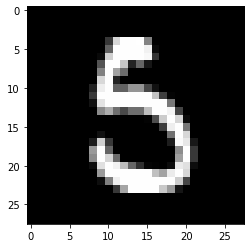

预测序号：25
我的预测：6
label:3


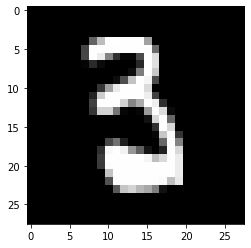

预测序号：33
我的预测：5
label:3


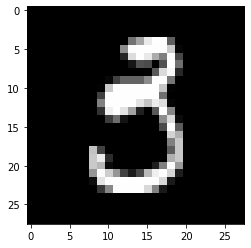

预测序号：52
我的预测：6
label:2


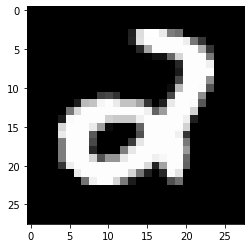

预测序号：78
我的预测：3
label:9


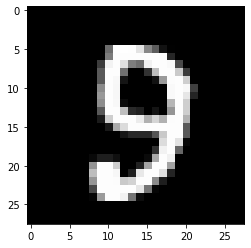

预测序号：79
我的预测：4
label:9


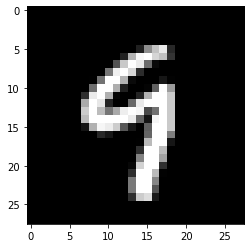

预测序号：90
我的预测：9
label:4


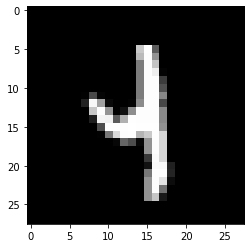

预测序号：120
我的预测：4
label:1


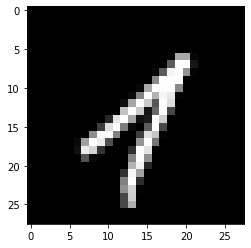

预测序号：144
我的预测：4
label:9


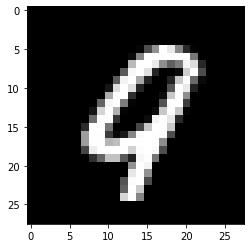

预测序号：149
我的预测：6
label:4


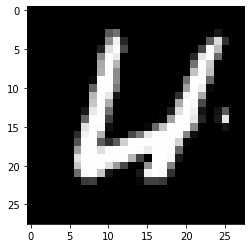

预测序号：155
我的预测：3
label:5


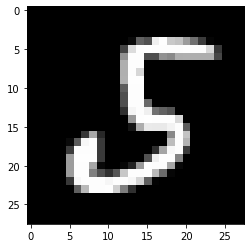

预测序号：192
我的预测：6
label:0


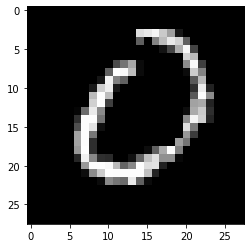

预测序号：212
我的预测：8
label:3


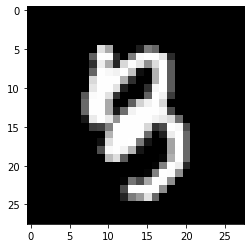

预测序号：223
我的预测：8
label:5


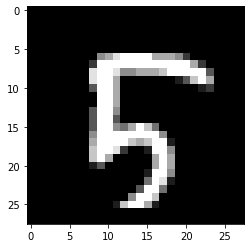

预测序号：228
我的预测：0
label:9


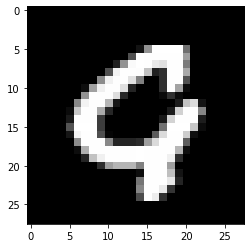

预测序号：233
我的预测：9
label:7


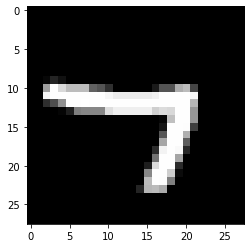

预测序号：236
我的预测：8
label:0


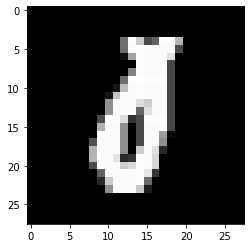

预测序号：239
我的预测：0
label:9


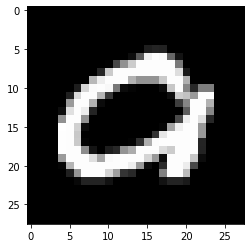

预测序号：246
我的预测：7
label:8


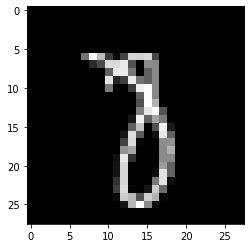

预测序号：274
我的预测：3
label:8


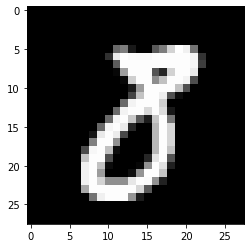

预测序号：297
我的预测：5
label:3


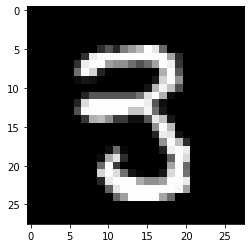

预测序号：317
我的预测：5
label:3


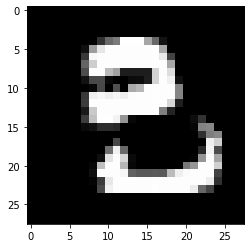

预测序号：320
我的预测：7
label:5


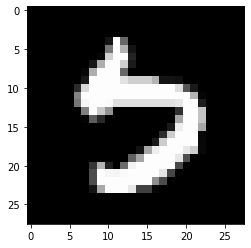

预测序号：322
我的预测：3
label:5


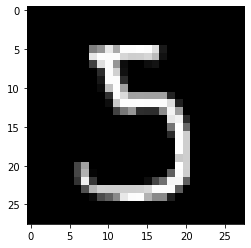

预测序号：329
我的预测：7
label:9


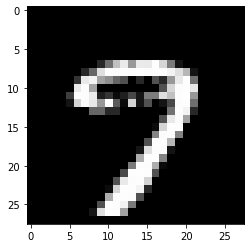

预测序号：340
我的预测：2
label:3


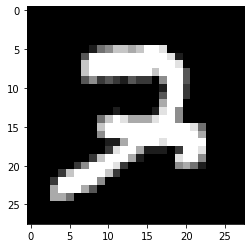

预测序号：359
我的预测：1
label:7


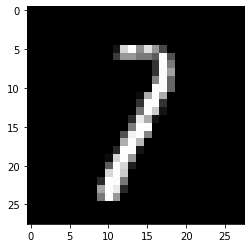

预测序号：369
我的预测：9
label:3


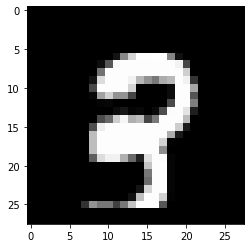

预测序号：371
我的预测：0
label:7


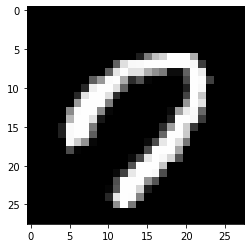

预测序号：391
我的预测：4
label:9


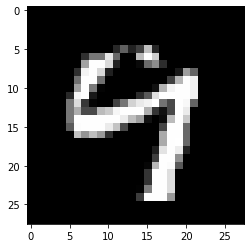

预测序号：396
我的预测：5
label:1


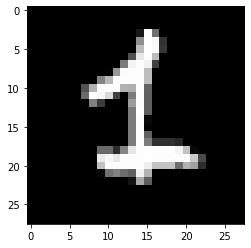

KeyboardInterrupt: 

In [44]:
validate_verify_show()

In [334]:
train_verify(parameters)

准确率：90.538%


In [35]:
test_verify(parameters)

准确率：91.5%


In [36]:
validate_verify(parameters)

准确率：91.59%


In [106]:
def train_random_verify():
    error_num=0
    rand_num=100
    for i in range(rand_num):
        
        index=random.randint(0,train_num)
        pr=predict(train_image[index],parameters)
        pe=pr.argmax()
        px=train_label[index]
        if px!=pe:
            print('{}====not===={}'.format(px,pe))
            print(pr)
            error_num+=1
    #print('随机预测准确率为：{}%'.format(100-100*error_num/rand_num))
    return 100-100*error_num/rand_num

In [107]:
tem_verify_list=[]
for i in range(100):
    tem_verify_list.append(train_random_verify())
#print(max(tem_verify_list))

5====not====6
[9.96882347e-05 6.58556419e-10 7.93776892e-07 2.84090552e-06
 1.55765956e-07 3.05181890e-02 9.68453850e-01 7.26243871e-13
 9.24261240e-04 2.20496255e-07]
7====not====9
[5.78069969e-09 5.59674622e-03 3.51212804e-04 7.18226890e-08
 2.77628035e-02 3.53399730e-09 2.00244522e-05 4.02743438e-01
 7.84903575e-03 5.55676658e-01]
3====not====5
[3.38221808e-04 1.22059995e-05 7.51197581e-09 4.24376351e-03
 1.32540213e-06 9.86118230e-01 5.34174713e-04 3.78418990e-07
 8.64672060e-03 1.04971979e-04]
9====not====7
[2.03156556e-07 3.47519638e-03 6.55627050e-07 9.92119864e-03
 2.35622429e-04 4.54699184e-04 7.85908409e-07 6.51338470e-01
 1.31574077e-03 3.33257427e-01]
5====not====7
[7.11869235e-04 2.38777618e-13 3.02686042e-15 5.35847771e-04
 1.53297182e-08 4.05112720e-01 3.29981242e-13 5.88099456e-01
 1.98950014e-03 3.55059146e-03]
7====not====4
[2.09355284e-13 6.25101735e-11 1.22670825e-10 2.23207493e-08
 9.83187570e-01 3.19217600e-10 1.38579479e-04 7.86540255e-05
 5.51575508e-03 1.107941

 3.14182539e-04 3.95774146e-03]
5====not====0
[6.73045223e-01 3.94084415e-08 7.21154894e-02 8.19957720e-03
 7.12291321e-05 7.26831124e-03 7.71383940e-06 2.79970539e-07
 2.39227537e-01 6.45998942e-05]
2====not====4
[5.91364780e-06 1.19117340e-05 1.65742846e-03 2.73788658e-05
 5.32091503e-01 9.72535000e-09 1.48471544e-03 1.12369579e-02
 5.32096712e-05 4.53430972e-01]
2====not====7
[2.65748754e-12 3.92218713e-07 4.07959999e-03 2.32568813e-05
 1.32826090e-07 5.57251850e-07 1.23890200e-06 9.95891357e-01
 3.89008498e-07 3.07608599e-06]
8====not====3
[2.01431946e-04 5.00261496e-10 1.21949542e-03 9.97736322e-01
 3.70810434e-09 3.35969852e-04 4.42777265e-12 6.90763572e-09
 5.04412386e-04 2.35708883e-06]
1====not====7
[1.42397970e-05 4.70789896e-06 1.19020100e-04 9.40449856e-03
 2.91820827e-03 1.96277929e-05 7.18900449e-06 9.86357483e-01
 3.40952373e-04 8.14073218e-04]
7====not====4
[8.27248405e-11 5.68408490e-11 4.91248454e-19 4.13525311e-09
 6.96782265e-01 1.19231452e-07 2.57599557e-10 1.47382

 3.80760603e-03 9.39268896e-03]
5====not====8
[8.43246537e-03 2.36507265e-10 1.24865738e-07 1.01372189e-02
 4.53672370e-08 2.10575445e-03 5.48562930e-07 5.89285471e-09
 9.79322142e-01 1.69461943e-06]
3====not====8
[1.61580256e-05 1.65132267e-03 2.45340874e-02 2.91551127e-01
 2.18363393e-10 2.01086507e-01 1.12266755e-04 4.62828532e-08
 4.81032518e-01 1.59659020e-05]
7====not====4
[6.92019153e-09 2.14108241e-03 7.26358278e-10 6.92085730e-05
 4.82248339e-01 5.93298392e-04 6.21384663e-06 1.19601160e-01
 1.07422892e-02 3.84598400e-01]
6====not====8
[5.77775129e-04 6.88286701e-07 1.15703292e-04 3.97819172e-04
 1.30103401e-05 2.74554307e-01 1.77062565e-04 4.65273781e-09
 7.19731159e-01 4.43247024e-03]
5====not====6
[6.18869135e-04 2.63018081e-06 4.01196760e-03 2.54214738e-06
 1.68096273e-03 9.52502787e-03 9.77699137e-01 1.23683671e-08
 6.33155551e-03 1.27295836e-04]
6====not====8
[1.35361927e-02 1.00002971e-08 2.06757077e-01 3.08602368e-06
 4.14313229e-04 2.43289144e-01 1.64299394e-01 1.32378

 5.59134155e-01 7.46849018e-02]
9====not====1
[2.59390266e-05 2.35539494e-01 2.88379591e-03 1.84619444e-01
 1.56654320e-04 9.20840432e-03 1.86312553e-05 1.36874116e-01
 2.14441831e-01 2.16231690e-01]
9====not====5
[2.49387034e-03 6.41970803e-11 1.38558731e-08 3.10891312e-01
 3.29652558e-04 4.78888680e-01 1.75661176e-09 1.15299514e-04
 9.48378214e-02 1.12443349e-01]
7====not====2
[5.78934684e-03 8.49918673e-04 8.15800154e-01 2.51215526e-03
 7.89006639e-05 5.32409435e-03 4.28619972e-05 6.00844495e-02
 1.01646284e-01 7.87183468e-03]
0====not====6
[3.12542958e-03 4.02579024e-11 9.51978224e-07 2.15575365e-10
 7.45852047e-04 2.60499091e-09 9.23095691e-01 7.28780063e-02
 1.14238394e-07 1.53952303e-04]
3====not====2
[5.05279400e-05 3.84269013e-02 8.44180269e-01 6.76947275e-02
 1.64084108e-04 3.79442470e-03 2.04334575e-02 3.14641684e-04
 2.48769162e-02 6.40497681e-05]
2====not====4
[2.14801997e-07 3.96160269e-04 6.00528696e-07 4.79935001e-08
 8.43172558e-01 3.25962738e-06 1.97554435e-02 1.19450

 2.41601245e-01 5.37925680e-01]
9====not====7
[3.77136727e-06 1.58642360e-11 2.37562560e-13 3.33552886e-05
 6.52252175e-05 1.06035618e-03 1.29859682e-09 5.18638516e-01
 4.54302009e-04 4.79744472e-01]
4====not====9
[5.60987179e-08 2.74731338e-02 7.37769715e-05 3.20949586e-02
 2.88608895e-01 6.61308283e-03 1.60290513e-05 5.06514470e-02
 1.13288972e-01 4.81179649e-01]
5====not====9
[9.13170142e-02 2.07734862e-03 9.97380234e-08 9.99511247e-05
 9.12977055e-03 2.12365680e-01 6.72900642e-03 1.46719862e-01
 1.35025547e-01 3.96535721e-01]
9====not====3
[2.58963874e-03 6.88390294e-10 4.63748871e-05 9.94197112e-01
 1.27248718e-06 1.71605939e-03 4.49189763e-10 1.93519106e-05
 1.32408919e-03 1.06100314e-04]
3====not====8
[4.80101405e-07 4.72410339e-10 1.50319250e-08 3.57014873e-03
 1.20905531e-03 3.80321972e-02 1.11453900e-10 2.87912147e-05
 4.98962798e-01 4.58196514e-01]
2====not====1
[6.71607695e-09 6.44090643e-01 3.48782490e-01 6.25784432e-03
 1.80212905e-10 9.16249985e-05 3.27443266e-04 3.21181

 9.47814792e-01 6.28119431e-06]
2====not====5
[1.63907171e-02 3.12370277e-08 1.38742870e-02 3.75948616e-03
 4.14744520e-02 5.72549710e-01 2.35589859e-01 5.84759185e-06
 1.16121290e-01 2.34319371e-04]
7====not====9
[1.84768712e-06 1.77127276e-06 3.98853654e-05 2.56400511e-05
 7.11357181e-03 7.02671098e-05 4.66330891e-06 1.66821135e-01
 9.86024809e-05 8.25822616e-01]
5====not====6
[2.21955564e-04 2.33043431e-08 5.42891550e-04 1.08322595e-03
 2.28695775e-02 2.34554651e-01 4.54650299e-01 1.29184311e-09
 2.84337799e-01 1.73957526e-03]
7====not====9
[5.54733464e-10 2.01987872e-04 3.87980282e-05 6.42282083e-04
 7.66252433e-03 2.75831645e-04 2.21781984e-04 6.57648706e-03
 1.10364033e-02 9.73343903e-01]
2====not====9
[4.37282752e-05 1.19074032e-04 4.04102490e-01 3.79086988e-03
 3.17777125e-03 7.14229953e-04 5.50384516e-02 7.46691051e-11
 2.80122030e-02 5.05001182e-01]
5====not====3
[2.03386197e-04 2.65283495e-08 1.72493058e-04 9.93846468e-01
 1.26594152e-12 5.74915769e-03 1.97615788e-09 2.56341

 4.90264014e-01 3.28191729e-02]
5====not====3
[4.18831855e-03 1.34100206e-05 1.79030374e-03 6.64362325e-01
 1.27503785e-06 1.59591139e-01 7.24152391e-06 2.45309027e-08
 1.69965441e-01 8.05227482e-05]
9====not====3
[4.66651014e-04 2.60307529e-03 4.83970825e-04 8.68073600e-01
 5.23454532e-06 6.35765165e-02 1.87994380e-05 3.57246046e-04
 4.01076034e-02 2.43073027e-02]
7====not====9
[6.50533073e-07 2.76551541e-03 4.72877986e-14 3.53996831e-07
 1.74863626e-01 3.38632033e-01 1.95737610e-03 1.24101000e-04
 1.35983869e-01 3.45672474e-01]
4====not====6
[5.39923826e-06 7.68255688e-03 3.57424606e-03 7.33930420e-04
 2.52733121e-02 7.12855025e-03 8.07766002e-01 1.91113223e-06
 1.18399209e-01 2.94348832e-02]
8====not====9
[1.67224618e-06 1.55047848e-05 1.38765160e-06 4.42851857e-06
 4.75222284e-02 2.93095832e-03 1.54669690e-04 2.22138889e-03
 3.60821272e-01 5.86326490e-01]
9====not====4
[9.31063153e-08 4.52197927e-10 8.13299095e-05 7.10422554e-06
 6.41354966e-01 3.05212479e-04 2.55108438e-04 3.05282

 9.99615661e-01 3.87493050e-05]
2====not====6
[1.17054022e-07 3.59107326e-14 1.09338982e-01 3.22165810e-10
 7.86120019e-05 1.85044792e-10 8.90581171e-01 6.00650359e-10
 1.11693467e-06 9.19392713e-12]
5====not====8
[7.31160924e-07 1.69628270e-07 2.24637723e-02 2.36859008e-01
 4.28862687e-02 1.78605167e-01 4.46268120e-06 1.99119884e-04
 4.86033688e-01 3.29476114e-02]
3====not====9
[1.24780464e-09 1.42731961e-03 5.11057565e-03 9.68453282e-02
 1.22111979e-06 7.34607011e-05 1.64001896e-05 1.55660544e-04
 4.35253387e-01 4.61116645e-01]
2====not====8
[1.21521431e-07 2.77390627e-03 1.50117513e-01 8.75664419e-02
 1.92118587e-05 2.86738033e-04 3.43496824e-03 8.69663875e-09
 7.53782320e-01 2.01877073e-03]
1====not====2
[2.68632761e-08 2.89512223e-01 6.50236785e-01 1.58172892e-04
 6.57716308e-03 2.76781465e-06 6.59239209e-03 2.61524273e-04
 4.44781802e-02 2.18076481e-03]
2====not====3
[2.65674093e-03 5.16732332e-09 1.21680606e-03 9.87687006e-01
 3.65033330e-06 8.36697139e-03 5.11473147e-05 2.44530

 2.91935012e-02 1.42625038e-02]
2====not====7
[8.16942697e-02 9.68593487e-15 3.41937196e-06 3.68784748e-04
 1.40874849e-06 2.15827899e-01 2.01276598e-07 6.26530675e-01
 2.65881476e-02 4.89851947e-02]
4====not====2
[5.49182732e-08 3.59062450e-03 9.21727748e-01 7.14874766e-02
 1.32599381e-11 1.71230014e-05 4.22736001e-04 7.35223839e-14
 2.75421614e-03 2.09349264e-08]
3====not====8
[2.62674481e-03 8.32130067e-06 9.96581515e-05 4.45668263e-01
 6.20299226e-06 7.20183393e-03 2.41643694e-05 6.55670806e-05
 5.44252973e-01 4.62711784e-05]
4====not====1
[1.54096982e-08 9.00491839e-01 4.08678057e-05 5.59717644e-03
 1.66059907e-02 3.05204994e-04 2.31140548e-04 5.66138321e-05
 5.98335635e-02 1.68375876e-02]
7====not====9
[4.42886394e-08 5.22019103e-04 1.35713372e-04 7.29206175e-03
 1.01156424e-03 2.56990744e-05 6.66668471e-07 1.30949294e-03
 1.58332501e-01 8.31370237e-01]
0====not====5
[2.48279649e-01 9.01275374e-09 1.52045439e-03 1.68480046e-04
 2.70391251e-04 7.49686826e-01 1.81908848e-05 2.75472

 8.60498083e-01 5.55689794e-03]
2====not====6
[9.70631369e-05 1.00940562e-06 5.97819939e-02 4.34240123e-05
 1.35555981e-14 3.83774770e-04 9.39664737e-01 1.27584003e-16
 2.79979265e-05 2.55703894e-11]
5====not====2
[3.66760017e-03 1.30119073e-08 4.90575198e-01 3.51687379e-01
 3.99044763e-14 1.53205790e-01 4.24914391e-05 6.78439217e-11
 8.21528157e-04 6.25089399e-13]
9====not====4
[8.41573480e-13 3.53235318e-12 5.18195719e-13 2.73986782e-12
 6.14330709e-01 1.48816499e-08 3.87834351e-06 4.46440700e-08
 5.37802877e-04 3.85127550e-01]
8====not====1
[4.71587640e-06 5.38448788e-01 3.71911283e-02 9.08424219e-02
 4.75612991e-05 9.44953714e-04 3.91628669e-04 5.07333499e-05
 3.17313455e-01 1.47646146e-02]
5====not====8
[2.52075038e-01 1.26493062e-11 2.73112750e-07 2.75391524e-03
 1.35597376e-11 2.81008912e-01 5.82517559e-09 2.65758623e-07
 4.64160999e-01 5.91435628e-07]
0====not====6
[1.88970074e-05 3.31173589e-06 2.56155544e-07 8.56596112e-11
 1.40707203e-01 1.50871230e-06 5.96349990e-01 2.45958

 2.39698849e-01 1.57824753e-03]
5====not====3
[1.24709755e-01 1.50422933e-05 3.93431110e-02 6.87919668e-01
 1.37101988e-12 1.47758700e-01 1.29422201e-04 6.83972241e-05
 5.58880494e-05 1.60883052e-08]
5====not====3
[4.18831855e-03 1.34100206e-05 1.79030374e-03 6.64362325e-01
 1.27503785e-06 1.59591139e-01 7.24152391e-06 2.45309027e-08
 1.69965441e-01 8.05227482e-05]
2====not====8
[1.40119966e-05 4.47009358e-07 3.67347122e-02 1.00893438e-01
 1.47051235e-09 1.75107704e-04 4.12713316e-11 4.54925483e-06
 8.61986005e-01 1.91727134e-04]
3====not====5
[4.31264452e-04 1.16640657e-06 6.13693893e-05 3.98310251e-01
 1.68283360e-04 5.76855658e-01 2.51311319e-04 9.61993394e-07
 2.38831692e-02 3.65646875e-05]
4====not====9
[8.63949079e-06 2.12465755e-08 3.60817318e-03 5.15564530e-07
 1.92841213e-02 2.86511330e-07 5.22084687e-06 5.57664873e-03
 1.07441571e-04 9.71408932e-01]
3====not====2
[1.84735948e-01 4.82232574e-08 8.08023233e-01 3.83615340e-03
 6.00565481e-12 3.36068505e-05 3.35837793e-03 2.28567

In [102]:
tem_verify_list

[96.0,
 90.0,
 96.0,
 93.0,
 96.0,
 93.0,
 94.0,
 96.0,
 93.0,
 96.0,
 92.0,
 98.0,
 94.0,
 93.0,
 93.0,
 92.0,
 93.0,
 99.0,
 96.0,
 99.0,
 89.0,
 99.0,
 94.0,
 93.0,
 97.0,
 96.0,
 91.0,
 100.0,
 94.0,
 95.0,
 97.0,
 93.0,
 92.0,
 97.0,
 96.0,
 98.0,
 99.0,
 91.0,
 93.0,
 96.0,
 94.0,
 95.0,
 96.0,
 98.0,
 98.0,
 95.0,
 95.0,
 97.0,
 94.0,
 91.0,
 92.0,
 90.0,
 91.0,
 92.0,
 96.0,
 97.0,
 98.0,
 92.0,
 90.0,
 98.0,
 93.0,
 97.0,
 99.0,
 97.0,
 95.0,
 92.0,
 98.0,
 94.0,
 90.0,
 96.0,
 97.0,
 96.0,
 93.0,
 92.0,
 95.0,
 93.0,
 95.0,
 96.0,
 95.0,
 95.0,
 93.0,
 93.0,
 96.0,
 96.0,
 93.0,
 97.0,
 94.0,
 93.0,
 97.0,
 90.0,
 95.0,
 94.0,
 89.0,
 95.0,
 94.0,
 97.0,
 98.0,
 92.0,
 94.0,
 94.0]

In [166]:
calculate_a_grad(train_image[10],train_label[10])[1]['w']

array([[ 2.60821167e-06,  4.36280738e-06,  1.96123272e-05, ...,
         1.78731960e-06,  1.79013782e-11,  1.30798827e-06],
       [ 5.04589836e-07,  8.44037425e-07,  3.79423998e-06, ...,
         3.45778419e-07,  3.46323635e-12,  2.53046021e-07],
       [ 6.23591339e-06,  1.04309360e-05,  4.68906629e-05, ...,
         4.27326141e-06,  4.27999940e-11,  3.12723912e-06],
       ...,
       [ 2.48053753e-06,  4.14924432e-06,  1.86522875e-05, ...,
         1.69982882e-06,  1.70250908e-11,  1.24396115e-06],
       [ 4.45469762e-06,  7.45146106e-06,  3.34968932e-05, ...,
         3.05265424e-06,  3.05746760e-11,  2.23397982e-06],
       [-2.67674430e-06, -4.47744328e-06, -2.01276552e-05, ...,
        -1.83428271e-06, -1.83717497e-11, -1.34235660e-06]])

In [167]:
parameters[1]['w']

array([[ 0.02213928, -0.00600438,  0.04050782, ...,  0.02004135,
        -0.00586598, -0.05779879],
       [ 0.07282693, -0.02351345, -0.00719983, ...,  0.06693043,
         0.08489681, -0.04875284],
       [ 0.06800148,  0.06631436, -0.05154142, ...,  0.02434495,
        -0.07647174, -0.03579854],
       ...,
       [-0.03185155,  0.08050144, -0.05657289, ..., -0.0755786 ,
        -0.00115466,  0.06889267],
       [ 0.01357802,  0.084551  ,  0.08221572, ..., -0.06006656,
        -0.07916622,  0.06721354],
       [-0.01558065, -0.04965199,  0.01600575, ..., -0.04638949,
         0.0227035 ,  0.0111774 ]])

In [193]:
validate_verify(parameters)

准确率：87.63%


In [30]:
def train_verify(parameters):
    
    error_num=0
    for i in range(train_num):
        
        if predict(train_image[i],parameters).argmax()!=train_label[i]:
        
            error_num+=1
            
    rate=1-error_num/train_num
    print('准确率：'+str(rate*100)+'%')
    

In [31]:
train_verify(parameters)

准确率：90.84%


In [32]:
def test_verify(parameters):
    error_num=0
    for i in range(test_num):
        
        if predict(test_image[i],parameters).argmax()!=test_label[i]:


            error_num+=1
            
    rate=1-error_num/test_num
    print('准确率：'+str(rate*100)+'%')

In [33]:
test_verify(parameters)

准确率：91.5%


In [104]:
predict(train_image[0],parameters).argmax()

5